In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys

In [3]:
sys.version

'3.7.2 (default, Feb 21 2019, 17:35:59) [MSC v.1915 64 bit (AMD64)]'

# Image PCA

### Source Image
![landscqape.jpg](landscape.jpg)

In [4]:
from matplotlib import image
from sklearn.cluster import KMeans

In [5]:
im = image.imread('landscape.jpg')

In [6]:
im.shape

(175, 289, 3)

In [7]:
imresh = im.reshape((im.shape[0]*im.shape[1], 3))

In [8]:
km = KMeans(n_clusters=8)

In [9]:
km.fit(imresh)

KMeans()

In [10]:
centers = km.cluster_centers_
print(centers)

[[ 55.86876323 126.48684608 207.83882673]
 [ 61.45831051  72.78141777  46.82031336]
 [169.71026864 162.17323625 140.79789104]
 [ 10.70088859 110.6455229   82.13438141]
 [111.31554011 116.32738471  90.81743525]
 [ 18.57468831  37.16106014  23.05677096]
 [ 15.93975627 178.03357094 163.17774201]
 [209.45321209 209.2537401  216.98445292]]


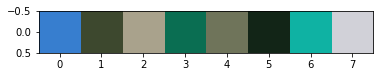

In [11]:
plt.imshow(np.array([centers/255.]))

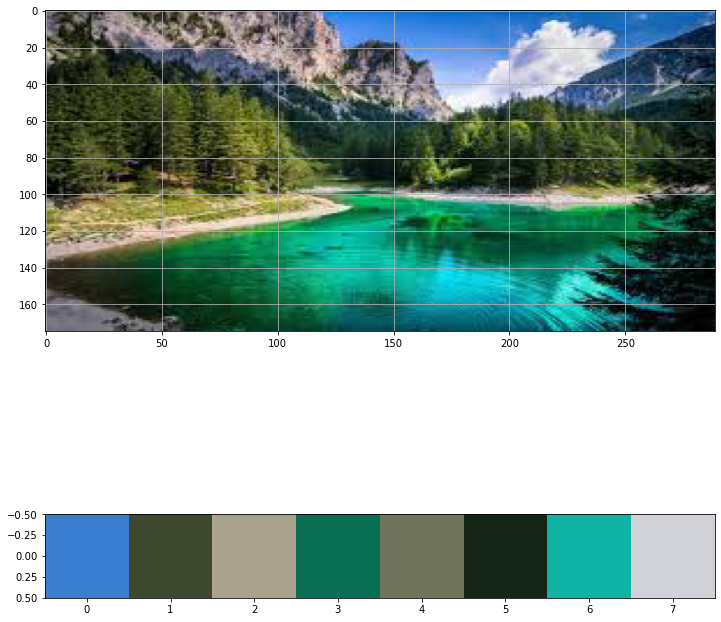

In [12]:
plt.figure(figsize=[12,13])
plt.subplot(211)
plt.imshow(im, aspect='auto')
plt.grid()
plt.subplot(212)
plt.imshow(np.array([centers/255.]))
plt.show()

### Possible TD Implementation
The following could be placed in a `Text Dat`, reading form a TOP called `null1`, writing to a `script CHOP` named `script1`.

```python
from sklearn.cluster import KMeans

myTop = op('null1') #input TOP path

arrayData = myTop.numpyArray() #get array data
rgb = arrayData[:,:,0:3] #drop alpha

reshaped = rgb.reshape([rgb.shape[0]*rgb.shape[1],3 ]) #reshepe to one pixel line
 
# K-Means Clustering
nClusters = 8
km = KMeans(n_clusters=nClusters)
km.fit(reshaped)
#getting cluster centers
centers = km.cluster_centers_

# Write to a script CHOP named 'script1'
so = op('script1')
so.clear()
so.numSamples = centers.shape[0]

for i,c in enumerate(['r', 'g', 'b']):
	c = so.appendChan(c)
	c.vals = centers[:,i]

```




# Simple Classifier Example

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [14]:
clf = RandomForestClassifier()

In [15]:
c1 = np.random.random(1000)
c2 = np.random.random(1000)-2
allC = np.concatenate([c1,c2])

labels = np.zeros_like(allC)
labels[1000:] = 1

x = allC
y = labels

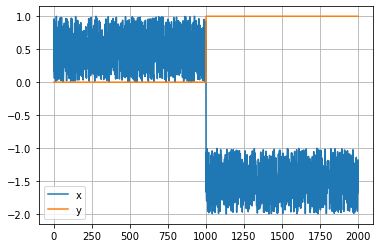

In [16]:
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()
plt.grid()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(x[:,np.newaxis], y, test_size=0.33, random_state=42)

In [19]:
clf.fit(xTrain,yTrain)

RandomForestClassifier()

In [20]:
yPred = clf.predict(xTest)

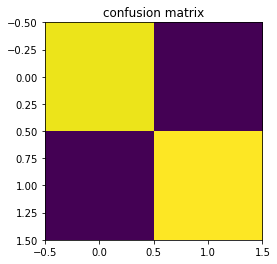

In [21]:
plt.imshow(confusion_matrix(yTest,yPred))
plt.title('confusion matrix')
plt.show()

In [22]:
print('acc: ', accuracy_score(yTest,yPred))
print('precision: ', precision_score(yTest,yPred))
print('recall: ', recall_score(yTest,yPred))



acc:  1.0
precision:  1.0
recall:  1.0


### Save Model

In [23]:
from joblib import dump, load
dump(clf, 'simpleRF.joblib') 

['simpleRF.joblib']

## Code to run in TD

Make a `chop execute DAT` for example to run a module called AI (a `text DAT` called 'AI"). Make a `constant CHOP` that will output our prediction.

#### Contents of the `chop execute DAT`:

```python
def onValueChange(channel, sampleIndex, val, prev):
	pred = mod.AI.predictSingle(val)
	# print(pred)
	op('constant2').par.value0 = float(pred)
	return
	

```

#### Contents of the 'AI' `text DAT`:
```python
from joblib import load
import numpy as np
global clf
clf = load('filename.joblib') 


def predictSingle(x):
	xarr = np.array([x])
	y = clf.predict(xarr[np.newaxis, :])
	return y

```






# Face Recognition

### Source Image

![test img](happy-people-1050x600.jpg)

In [76]:
import cv2
import os

In [45]:
haarDir = cv2.data.haarcascades
print(haarDir)

C:\Users\hrtlacek\Anaconda3\envs\td1\lib\site-packages\cv2\data\


In [60]:
# test_image = cv2.imread('faces.jpg')
test_image = cv2.imread('happy-people-1050x600.jpg')

In [81]:
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

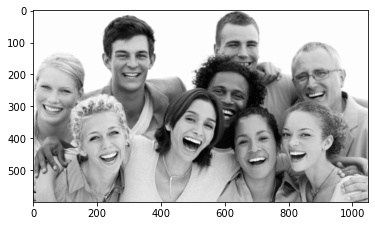

In [82]:
plt.imshow(test_image_gray, cmap='gray')

In [83]:
test_image_gray.shape

(600, 1050)

In [84]:
test_image_gray.dtype

dtype('uint8')

In [85]:
print(test_image_gray)

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [176 167 156 ... 207 209 209]
 [197 192 187 ... 198 197 197]
 [205 200 197 ... 206 200 200]]


In [86]:
haar_cascade_face = cv2.CascadeClassifier(os.path.join(haarDir, 'haarcascade_frontalface_default.xml'))

In [87]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.1, minNeighbors = 5);

In [88]:
print('Faces found: ', len(faces_rects))

Faces found:  10


In [89]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image_gray, (x, y), (x+w, y+h), (0, 255, 0), 2)

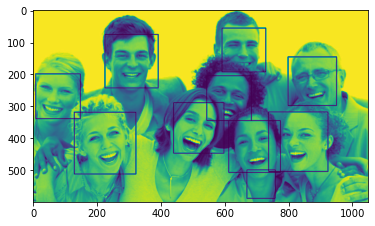

In [90]:
plt.imshow((test_image_gray))

## TD Implementation

Put this in a `text DAT` and execute. This is sampling from a TOP anmed `tocv` and writing to a `Script CHOP` named `script1`.


```python
import cv2
import os
import numpy as np

haarFile = cv2.data.haarcascades +'haarcascade_frontalface_default.xml'

inputTop = op('tocv')
img = inputTop.numpyArray()
img = img[:,:,0]

intArr = np.array(img*255, dtype='uint8')
intArr = np.flip(intArr)

toDetect = intArr

haar_cascade_face = cv2.CascadeClassifier(haarFile)
faces_rects = haar_cascade_face.detectMultiScale(toDetect, scaleFactor = 1.1, minNeighbors = 5);

so = op('script1')
so.clear()
so.numSamples = 4
for i in range(len(faces_rects)):
	c = so.appendChan()
	c.vals= np.array(faces_rects[i])

```

# Drum Classification using MFCCs
get dataset from: https://www.idmt.fraunhofer.de/en/business_units/m2d/smt/drums.html

In [141]:
import mfccLibNb as mf

## Get List of Samples

In [143]:
audioDir = 'IDMT-SMT-DRUMS-V2/audio/'

fileList = os.listdir(audioDir)

audioFiles = [os.path.join(audioDir,x) for x in fileList]
audioFiles = list(filter(lambda x: 'train' in x, audioFiles))

## Show/Construct Function for one Sample

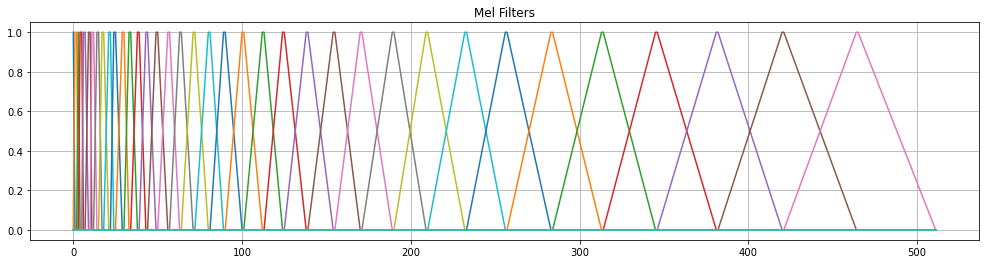

In [157]:
frameSize = 1024
nFilters = 40
filters = mf.makeMelFilters(sr=sr, frameLength=frameSize, nFilters=nFilters)
plt.figure(figsize=[17,4])
plt.plot(filters)
plt.title('Mel Filters')
plt.grid()
plt.show()

In [144]:
x,sr = librosa.load(audioFiles[0], mono=True, sr=None)

In [145]:
spec = mf.stft(x,frameSize=frameSize,windowFunction='hann',overlap=0)
spec = spec[:-1,:] #drop last value to make shape[0]==framesize/2

powSpec = mf.powerSpectrum(spec)

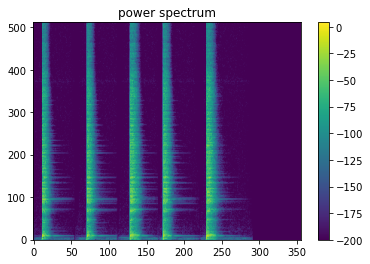

In [146]:
plt.imshow(mf.aToDb(powSpec), origin='lower',aspect='auto')
plt.colorbar()
plt.title('power spectrum')
plt.show()

In [147]:
filtered = np.dot(powSpec.T, filters).T

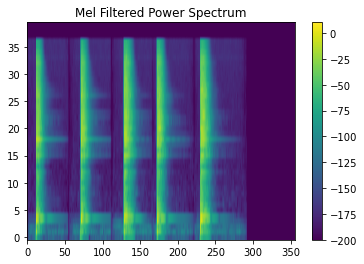

In [148]:
plt.imshow(mf.aToDb(filtered), origin='lower',aspect='auto')
plt.colorbar()
plt.title('Mel Filtered Power Spectrum')
plt.show()

In [149]:
logFiltered = np.log(filtered+np.finfo(float).eps)

In [151]:
ceps = np.zeros_like(logFiltered)
for i in range(logFiltered.shape[1]):
    ceps[:,i] = np.fft.irfft(logFiltered[:,i],len(logFiltered[:,i]))

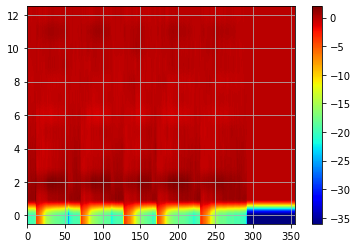

In [154]:
myMfcc = ceps[0:13,:]
plt.imshow(myMfcc, origin='lower', aspect='auto', cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

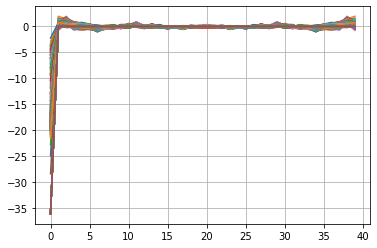

In [155]:
plt.plot(ceps)
plt.grid()
plt.show()

In [163]:
def getMfccs(x, frameSize = 1024, nFilters=40, nMfccs=12):

    filters = mf.makeMelFilters(sr=sr, frameLength=frameSize, nFilters=nFilters)
    
    spec = mf.stft(x,frameSize=frameSize,windowFunction='hann',overlap=0)
    spec = spec[:-1,:] #drop last value to make shape[0]==framesize/2
    powSpec = mf.powerSpectrum(spec)
    
    filtered = np.dot(powSpec.T, filters).T
    
    logFiltered = np.log(filtered+np.finfo(float).eps)
    
    ceps = np.zeros_like(logFiltered)
    for i in range(logFiltered.shape[1]):
        ceps[:,i] = np.fft.irfft(logFiltered[:,i],len(logFiltered[:,i]))
    
    mfccs = ceps[0:nMfccs,:]
    
    return np.average(mfccs, axis=1)

[-19.33208703   0.72602709   0.63355231  -0.23928871  -0.10534206
  -0.31005444  -0.07283388   0.026768     0.09300342   0.05295466
  -0.16959267  -0.12080614]


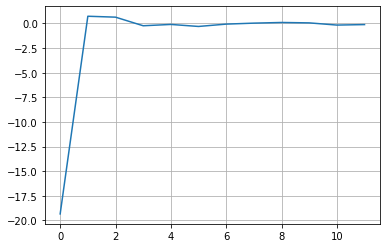

In [165]:
print(getMfccs(x))
plt.plot(getMfccs(x))
plt.grid()
plt.show()

# Calculate MFCCs for all files

In [110]:
len(list(audioFiles))

285

In [112]:
import pandas as pd

In [295]:
200*500

100000

In [113]:
audioFiles

In [298]:
from tqdm import tqdm

In [363]:
nMfcc = 12
nFrames = 46
yData = np.zeros(len(audioFiles)*nFrames)
xData = np.zeros([len(audioFiles)*nFrames, nMfcc])

for i,f in enumerate(tqdm(audioFiles)):
    x,sr = librosa.load(f)
    mfccs = librosa.feature.mfcc(x, n_mfcc=nMfcc)[:,0:nFrames]
    

    
    if 'KD' in f:
        label = 1
    elif 'SD' in f:
        label = 2
    elif 'HH' in f:
        label = 3

    mask = np.average(mfccs[1:,:]**2, axis=0)>100
    thisy = np.zeros(nFrames)
    thisy[mask] = label

    yData[i*nFrames:((i+1)*(nFrames))] = thisy
    xData[i*nFrames:((i+1)*(nFrames)),:] = mfccs.T
    
#     for j in range(mfccs.shape[1]):
#         if np.average(mfccs[1:, j]**2, axis=0)<100:
#             label = -1
        

#         yData[i*nFrames+j] = label 
        
    

100%|████████████████████████████████████████████████████████████████████████████████| 285/285 [05:02<00:00,  1.06s/it]


In [325]:
mfccs.shape

(12, 50)

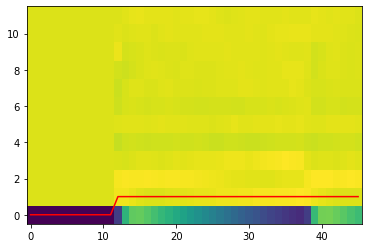

In [364]:
f = audioFiles[90]
x,sr = librosa.load(f)
mfccs = librosa.feature.mfcc(x, n_mfcc=nMfcc)[:,0:nFrames]

mask = np.average(mfccs[1:,:]**2, axis=0)>100           

plt.imshow(mfccs, origin='lower', aspect='auto')
plt.plot(mask, 'r')

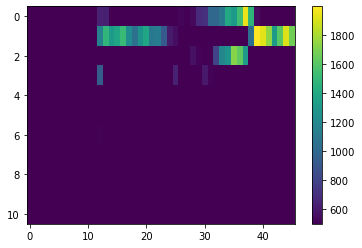

In [365]:
plt.imshow(mfccs[1:]**2, aspect='auto', vmin=500)
plt.colorbar()

In [366]:
mfccs.shape

(12, 46)

In [367]:
cols = ['label']
for i in range(12):
    cols.append('mfcc'+str(i+1))

In [368]:
xData.shape

(13110, 12)

In [369]:
yData.shape

(13110,)

In [370]:
np.concatenate([yData[np.newaxis,:],xData.T]).T

array([[ 0.00000000e+00, -7.08630836e+02,  7.61751355e-01, ...,
         3.38520363e-01,  2.56910118e-01,  1.74362431e-01],
       [ 0.00000000e+00, -7.06389252e+02,  3.91440809e+00, ...,
         2.26510105e+00,  1.93746625e+00,  1.60139566e+00],
       [ 0.00000000e+00, -7.02813404e+02,  8.89030475e+00, ...,
         3.60610785e+00,  2.94562713e+00,  2.36405486e+00],
       ...,
       [ 2.00000000e+00, -3.57084148e+02,  5.94479089e+01, ...,
        -8.57775670e+00, -9.44080851e+00,  2.20171580e+00],
       [ 2.00000000e+00, -3.99958001e+02,  6.21670238e+01, ...,
        -1.43437918e+01, -6.03832662e+00, -2.28460275e+00],
       [ 2.00000000e+00, -4.38536930e+02,  6.34946385e+01, ...,
        -1.21135505e+01, -2.90651901e+00, -3.88210974e+00]])

In [371]:
data = pd.DataFrame(data =np.concatenate([yData[np.newaxis,:],xData.T]).T ,columns=cols)

In [372]:
display(data)

,label,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
0,0.0,-708.630836,0.761751,0.743375,0.713207,0.671923,0.620449,0.559937,0.491740,0.417382,0.338520,0.256910,0.174362
1,0.0,-706.389252,3.914408,3.844098,3.728459,3.569773,3.371164,3.136528,2.870447,2.578091,2.265101,1.937466,1.601396
2,0.0,-702.813404,8.890305,8.583796,8.097465,7.465156,6.728780,5.933735,5.124128,4.338431,3.606108,2.945627,2.364055
3,3.0,-698.195974,15.340874,14.801289,13.943622,12.825433,11.518161,10.099441,8.645090,7.221777,5.881308,4.657187,3.563819
4,3.0,-695.679549,18.866526,18.228836,17.211644,15.878096,14.306730,12.583196,10.791597,9.006584,7.287182,5.673074,4.183728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,2.0,-227.841965,79.241341,2.053400,18.298731,-15.748863,-0.049299,-15.859438,-2.462877,-11.690443,-10.826676,-7.782124,-4.028804
13106,2.0,-301.040795,61.225937,2.149581,13.702816,-21.528996,3.297747,-14.701477,0.468421,-6.583804,-5.574097,-13.233125,-3.697148
13107,2.0,-357.084148,59.447909,-1.791580,6.366027,-25.462036,-1.145540,-14.856024,-1.335548,-10.879995,-8.577757,-9.440809,2.201716
13108,2.0,-399.958001,62.167024,-9.123290,-1.230165,-35.484826,-10.642577,-18.593330,-2.915689,-17.685761,-14.343792,-6.038327,-2.284603


In [373]:
display(data.describe())

,label,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
count,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000
mean,0.942258,-620.087639,24.947101,8.646050,13.145178,3.228393,6.123688,0.987214,2.410765,0.441552,1.428092,-0.378653,0.685606
std,1.152605,238.294909,43.872414,18.719152,19.221971,16.410027,12.400622,12.087275,9.638351,9.798850,7.916167,7.699406,6.241581
min,0.000000,-1131.370850,-214.577904,-92.044707,-53.377389,-47.664154,-35.887184,-50.300223,-33.074324,-40.967770,-30.390167,-30.713634,-31.351149
25%,0.000000,-749.874024,0.000000,0.000000,0.000000,0.000000,0.000000,-1.120444,0.000000,-2.213478,0.000000,-2.413039,0.000000
50%,0.000000,-615.721297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,-491.021894,43.507561,16.553797,25.591359,4.441775,11.226634,1.651687,3.342556,0.000000,1.882752,0.000000,1.698950
max,3.000000,42.322500,230.926357,114.133510,100.346859,65.351872,62.314714,45.103155,38.255254,33.087220,29.420409,24.852025,29.241574


In [374]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.33, random_state=42)

In [375]:
clf2 = RandomForestClassifier(n_jobs=1,n_estimators=20)

In [376]:
clf2.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=20, n_jobs=1)

In [377]:
yPred = clf2.predict(xTest)

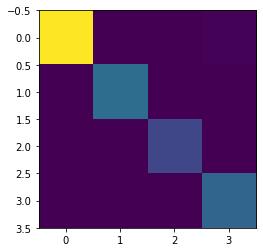

In [378]:
plt.imshow(confusion_matrix(yTest,yPred))

In [379]:
x,sr = librosa.load('IDMT-SMT-DRUMS-V2/audio/TechnoDrum01_00#MIX.wav')

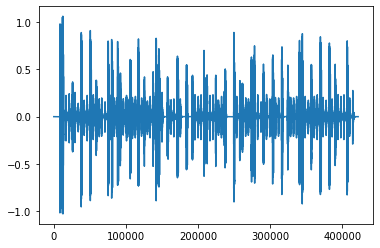

In [380]:
plt.plot(x)

In [381]:
mf = librosa.feature.mfcc(x,n_mfcc=nMfcc)

In [382]:
pred = clf2.predict(mf.T)

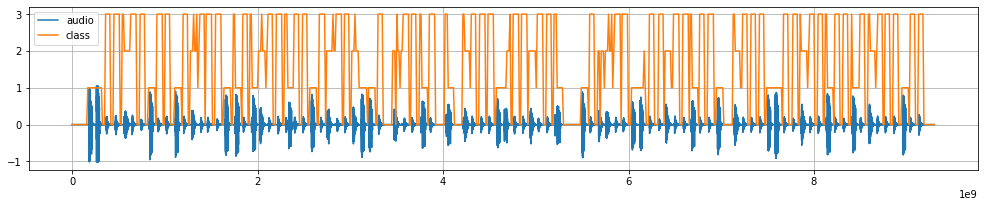

In [383]:
T = len(x)*sr

plt.figure(figsize=[17,3])

plt.plot(np.linspace(0,T,len(x)), x, label='audio')
plt.plot(np.linspace(0,T,len(pred)), pred, label='class')
plt.grid()
plt.legend()


## Save model for use in TD

In [385]:
dump(clf2, 'drumClass3.joblib') 

['drumClass3.joblib']

# Tweak Settings above and see realtime performace below

In [277]:
%%timeit
pred = clf2.predict(oneTest.reshape(1,-1))

5.03 ms ± 228 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [279]:
ms = 5 
s = ms/1000.
fps = 1/s
fps

200.0

## Implementation in TD
Putthe followind in the code for a `Chop Execute Dat`. It writes to a `Script Chop` called `script1` and reads from a chop called `toAnalysis`. This CHOP is supposed to hold mfcc data.
The mfccs can be efficiently generated with this: https://github.com/hrtlacek/td_mfcc

```python
import numpy as np
from joblib import load

nMfcc =12
clf = load('drumClass3.joblib')

def onValueChange(channel, sampleIndex, val, prev):
	mfccs = op('toAnalysis')[0].numpyArray()
	pred = clf.predict(mfccs.reshape(1,-1))

	so = op('script1')
	so.clear()
	so.numSamples=1
	c = so.appendChan()
	c.vals=pred

	return
	
```